In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm

In [8]:
##Importing relevant data set
df_FF = pd.read_csv("../Data/Federal_Funds_Rate.csv")
df_FF['DATE'] = pd.to_datetime(df_FF.DATE)
df_FF = df_FF.set_index(pd.to_datetime(df_FF['DATE']), drop=True)
df_FF.drop('DATE', axis=1, inplace=True)
df_FF = df_FF['1971-07-01':'2022-04-01']
df_FF

,FEDFUNDS
DATE,
1971-07-01,5.31
1971-08-01,5.57
1971-09-01,5.55
1971-10-01,5.20
1971-11-01,4.91
...,...
2021-12-01,0.08
2022-01-01,0.08
2022-02-01,0.08


In [9]:
#Splitting off 30% of the data set to make a test data set
series_cutoff = round(df_FF.shape[0]*0.70)
series_cutoff

427

In [10]:
#Defining our train and test set
train_series = df_FF[:series_cutoff]

test_series = df_FF[series_cutoff:]

In [11]:
df_all = pd.read_csv("../Data/Federal_Funds_Rate.csv")
df_all['DATE'] = pd.to_datetime(df_all.DATE)

df1 = pd.read_csv('../Data/CPI.csv')
df1['DATE'] = pd.to_datetime(df1.DATE)
df_all = df_all.merge(df1, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')
df_all.CPIAUCSL = df_all.CPIAUCSL.interpolate()

df2 = pd.read_csv('../Data/GDP_Quarterly_Real.csv')
df2['DATE'] = pd.to_datetime(df2.DATE)
df2 = df2.set_index(pd.to_datetime(df2['DATE']), drop=True)
df2.drop('DATE', axis=1, inplace=True)
df2 = df2.resample('MS').interpolate()
df_all = df_all.merge(df2, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df3 = pd.read_csv('../Data/Unemployment_Rate.csv')
df3['DATE'] = pd.to_datetime(df3.DATE)
df_all = df_all.merge(df3, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df4 = pd.read_csv('../Data/Population_Over55.csv')
df4['DATE'] = pd.to_datetime(df4.DATE)
df_all = df_all.merge(df4, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df5 = pd.read_csv('../Data/Population_WorkingAge.csv')
df5['DATE'] = pd.to_datetime(df5.DATE)
df_all = df_all.merge(df5, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df6 = pd.read_csv('../Data/M1_MoneySupply.csv')
df6['DATE'] = pd.to_datetime(df6.DATE)
df_all = df_all.merge(df6, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df7 = pd.read_csv('../Data/M2_MoneySupply.csv')
df7['DATE'] = pd.to_datetime(df7.DATE)
df_all = df_all.merge(df7, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')
df_all

df8 = pd.read_csv('../Data/M2_velocity_quarterly.csv')
df8['DATE'] = pd.to_datetime(df8.DATE)
df8 = df8.set_index(pd.to_datetime(df8['DATE']), drop=True)
df8.drop('DATE', axis=1, inplace=True)
df8 = df8.resample('MS').interpolate()
df_all = df_all.merge(df8, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df9 = pd.read_csv('../Data/Population_Total.csv')
df9['DATE'] = pd.to_datetime(df9.DATE)
df_all = df_all.merge(df9, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df10 = pd.read_csv('../Data/Debt_to_GDP_Quarterly.csv')
df10['DATE'] = pd.to_datetime(df10.DATE)
df10 = df10.set_index(pd.to_datetime(df10['DATE']), drop=True)
df10.drop('DATE', axis=1, inplace=True)
df10 = df10.resample('MS').interpolate()
df_all = df_all.merge(df10, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df11 = pd.read_csv('../Data/Federal_Debt_Quarterly.csv')
df11['DATE'] = pd.to_datetime(df11.DATE)
df11 = df11.set_index(pd.to_datetime(df11['DATE']), drop=True)
df11.drop('DATE', axis=1, inplace=True)
df11 = df11.resample('MS').interpolate()
df_all = df_all.merge(df11, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

In [12]:
df12 = pd.read_csv('../Data/USDJPY_monthly.csv')
df12['DATE'] = pd.to_datetime(df12.DATE)
df_all = df_all.merge(df12, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df13 = pd.read_csv('../Data/Core_CPI.csv')
df13['DATE'] = pd.to_datetime(df13.DATE)
df_all = df_all.merge(df13, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df14 = pd.read_csv('../Data/Inital_Claims_4WeekMA.csv')
df14['DATE'] = pd.to_datetime(df14.DATE)
df14 = df14.set_index(pd.to_datetime(df14['DATE']), drop=True)
df14.drop('DATE', axis=1, inplace=True)
df14 = df14.resample('MS').mean()
df_all = df_all.merge(df14, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df15 = pd.read_csv('../Data/Continuing_Claims_4WeekMA.csv')
df15['DATE'] = pd.to_datetime(df15.DATE)
df15 = df15.set_index(pd.to_datetime(df15['DATE']), drop=True)
df15.drop('DATE', axis=1, inplace=True)
df15 = df15.resample('MS').mean()
df_all = df_all.merge(df15, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df16 = pd.read_csv('../Data/Mortgage_Rate_Weekly.csv')
df16['DATE'] = pd.to_datetime(df16.DATE)
df16 = df16.set_index(pd.to_datetime(df16['DATE']), drop=True)
df16.drop('DATE', axis=1, inplace=True)
df16 = df16.resample('MS').mean()
df_all = df_all.merge(df16, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df17 = pd.read_csv('../Data/Capacity_Utilization_Ind.csv')
df17['DATE'] = pd.to_datetime(df17.DATE)
df_all = df_all.merge(df17, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df18 = pd.read_csv('../Data/Total_Nonfarmpayrolls.csv')
df18['DATE'] = pd.to_datetime(df18.DATE)
df_all = df_all.merge(df18, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df19 = pd.read_csv('../Data/PPI_AllCommods.csv')
df19['DATE'] = pd.to_datetime(df19.DATE)
df_all = df_all.merge(df19, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df20 = pd.read_csv('../Data/Total_ConsumerCredit.csv')
df20['DATE'] = pd.to_datetime(df20.DATE)
df_all = df_all.merge(df20, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df21 = pd.read_csv('../Data/SPOT_WTI.csv')
df21['DATE'] = pd.to_datetime(df21.DATE)
df_all = df_all.merge(df21, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df22 = pd.read_csv('../Data/Motor_VehicleLoans.csv')
df22['DATE'] = pd.to_datetime(df22.DATE)
df22 = df22.set_index(pd.to_datetime(df22['DATE']), drop=True)
df22.drop('DATE', axis=1, inplace=True)
df22 = df22.resample('MS').interpolate()
df_all = df_all.merge(df22, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df23 = pd.read_csv('../Data/Federal_InterestPayments.csv')
df23['DATE'] = pd.to_datetime(df23.DATE)
df23 = df23.set_index(pd.to_datetime(df23['DATE']), drop=True)
df23.drop('DATE', axis=1, inplace=True)
df23 = df23.resample('MS').interpolate()
df_all = df_all.merge(df23, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')

df24 = pd.read_csv('../Data/Federal_TaxReceipts.csv')
df24['DATE'] = pd.to_datetime(df24.DATE)
df24 = df24.set_index(pd.to_datetime(df24['DATE']), drop=True)
df24.drop('DATE', axis=1, inplace=True)
df24 = df24.resample('MS').interpolate()
df_all = df_all.merge(df24, on='DATE', how='outer')
df_all = df_all.sort_values('DATE')
df_all

,DATE,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,...,CC4WSA,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA
0,1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN
1,1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN
2,1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN
3,1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN
4,1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2022-04-01,0.33,288.663,19681.682,3.6,98528.0,127126.0,20615.3,21655.5,1.147,...,1449500.0,4.9825,80.4220,151224.0,265.385,4563.48947,101.78,1365.13043,599.097,NaN
1312,2022-05-01,0.77,291.474,NaN,3.6,98646.0,127115.0,20620.7,21684.4,NaN,...,1338312.5,5.2300,80.3335,151610.0,273.270,4587.28211,109.55,NaN,NaN,NaN
1313,2022-06-01,1.21,295.328,NaN,3.6,98779.0,127121.0,20545.4,21667.5,NaN,...,1320937.5,5.5220,80.0490,152008.0,282.360,4627.43653,114.84,NaN,NaN,NaN
1314,2022-07-01,1.68,295.328,NaN,3.5,98908.0,127149.0,NaN,NaN,NaN,...,1358187.5,5.4125,NaN,152536.0,NaN,NaN,101.62,NaN,NaN,NaN


In [13]:
df_all.set_index('DATE', inplace=True)

In [14]:
##Forward filling the 3 variables that most recent data points end 1/1/2022 to forward 4/1/2022
df_all.GFDEGDQ188S = df_all.GFDEGDQ188S.ffill()
df_all.GFDEBTN = df_all.GFDEBTN.ffill()
df_all.W006RC1Q027SBEA = df_all.W006RC1Q027SBEA.ffill()

In [15]:
df_all['Fed_Int_Over_Receipts'] = (df_all['A091RC1Q027SBEA'] / df_all['W006RC1Q027SBEA'])
df_all

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,0.33,288.663,19681.682,3.6,98528.0,127126.0,20615.3,21655.5,1.147,332863.0,...,4.9825,80.4220,151224.0,265.385,4563.48947,101.78,1365.13043,599.097,2913.013,0.205662
2022-05-01,0.77,291.474,NaN,3.6,98646.0,127115.0,20620.7,21684.4,NaN,332928.0,...,5.2300,80.3335,151610.0,273.270,4587.28211,109.55,NaN,NaN,2913.013,NaN
2022-06-01,1.21,295.328,NaN,3.6,98779.0,127121.0,20545.4,21667.5,NaN,333028.0,...,5.5220,80.0490,152008.0,282.360,4627.43653,114.84,NaN,NaN,2913.013,NaN


Chose 4/1/2022 data end date because it represents the best date. Encompasses the beginning of the rate hiking cycle (shows in march monthly fed funds rate increase) while also limiting the ffills to only three variables. If chose 7/1/2022 end date, would need to forward fill 12 independent variables. 

In [16]:
df_all = df_all['1971-07-01':'2022-04-01']

In [17]:
##final data set
df_all

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
1971-07-01,5.31,40.600,5142.422000,6.0,38011.0,70789.0,224.9,679.6,1.717000,207771.0,...,7.6040,79.2256,71315.0,38.300,139.90802,3.56,39.412000,35.408000,135.276000,0.261746
1971-08-01,5.57,40.700,5146.463667,6.1,38070.0,70938.0,225.6,685.5,1.708000,207998.0,...,7.6975,78.5675,71373.0,38.500,141.25209,3.56,39.781000,35.616000,136.066667,0.261754
1971-09-01,5.55,40.800,5150.505333,6.0,38142.0,71087.0,226.5,692.5,1.699000,208230.0,...,7.6875,79.6440,71614.0,38.300,142.76657,3.56,40.150000,35.824000,136.857333,0.261762
1971-10-01,5.20,40.900,5154.547000,5.8,38214.0,71238.0,227.2,698.4,1.690000,208450.0,...,7.6280,80.0392,71642.0,38.300,143.92676,3.56,40.519000,36.032000,137.648000,0.261769
1971-11-01,4.91,41.000,5186.143667,6.0,38273.0,71362.0,227.8,704.6,1.692000,208648.0,...,7.5500,80.1781,71847.0,38.300,145.63484,3.56,41.236667,36.197333,141.976000,0.254954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.08,280.126,19754.042000,3.9,98741.0,126205.0,20430.7,21490.0,1.124333,332640.0,...,3.0980,78.7416,149240.0,241.338,4430.82582,71.71,1326.600173,554.535667,2814.255000,0.197045
2022-01-01,0.08,281.933,19727.918000,4.0,98159.0,127164.0,20585.4,21649.6,1.124000,332684.0,...,3.4450,78.9421,149744.0,246.453,4446.72147,83.22,1332.846310,561.075000,2913.013000,0.192610
2022-02-01,0.08,284.182,19712.506000,3.8,98255.0,127180.0,20661.3,21708.6,1.131667,332750.0,...,3.7625,79.4912,150458.0,252.660,4481.40108,91.64,1343.607683,573.749000,2913.013000,0.196961


In [18]:
##zero nulls within the data set 
df_all.isna().sum()

FEDFUNDS                 0
CPIAUCSL                 0
GDPC1                    0
UNRATE                   0
LNU00024230              0
LNU00000060              0
M1SL                     0
M2SL                     0
M2V                      0
POPTHM                   0
GFDEGDQ188S              0
GFDEBTN                  0
EXJPUS                   0
CPILFESL                 0
IC4WSA                   0
CC4WSA                   0
MORTGAGE30US             0
TCU                      0
PAYEMS                   0
PPIACO                   0
TOTALSL                  0
WTISPLC                  0
MVLOAS                   0
A091RC1Q027SBEA          0
W006RC1Q027SBEA          0
Fed_Int_Over_Receipts    0
dtype: int64

In [19]:
train = df_all.iloc[:int(0.7*len(df_all))]
test = df_all.iloc[int(0.7*len(df_all)):]

In [20]:
train

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
1971-07-01,5.31,40.600,5142.422000,6.0,38011.0,70789.0,224.9,679.6,1.717000,207771.0,...,7.6040,79.2256,71315.0,38.3,139.90802,3.56,39.412000,35.408000,135.276000,0.261746
1971-08-01,5.57,40.700,5146.463667,6.1,38070.0,70938.0,225.6,685.5,1.708000,207998.0,...,7.6975,78.5675,71373.0,38.5,141.25209,3.56,39.781000,35.616000,136.066667,0.261754
1971-09-01,5.55,40.800,5150.505333,6.0,38142.0,71087.0,226.5,692.5,1.699000,208230.0,...,7.6875,79.6440,71614.0,38.3,142.76657,3.56,40.150000,35.824000,136.857333,0.261762
1971-10-01,5.20,40.900,5154.547000,5.8,38214.0,71238.0,227.2,698.4,1.690000,208450.0,...,7.6280,80.0392,71642.0,38.3,143.92676,3.56,40.519000,36.032000,137.648000,0.261769
1971-11-01,4.91,41.000,5186.143667,6.0,38273.0,71362.0,227.8,704.6,1.692000,208648.0,...,7.5500,80.1781,71847.0,38.3,145.63484,3.56,41.236667,36.197333,141.976000,0.254954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-09-01,5.25,202.800,15390.601000,4.5,67347.0,125045.0,1364.4,6944.2,2.000000,299452.0,...,6.4025,80.4140,136843.0,165.4,2426.81323,63.87,787.348780,383.383000,1565.859333,0.244839
2006-10-01,5.25,201.900,15433.643000,4.4,67515.0,125113.0,1370.3,6993.3,1.997000,299710.0,...,6.3575,80.1481,136852.0,162.2,2429.39986,58.88,784.975120,386.925000,1569.927000,0.246461
2006-11-01,5.25,202.000,15448.747333,4.5,67628.0,125201.0,1370.8,7028.4,1.995667,299950.0,...,6.2400,79.9159,137063.0,164.6,2440.74907,59.37,783.628050,389.953000,1582.122333,0.246475


In [21]:
test

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
2007-02-01,5.26,204.226,15511.897000,4.5,68077.0,125456.0,1363.0,7125.3,1.990667,300608.0,...,6.2850,80.6246,137558.0,166.800,2470.04992,59.26,782.587247,399.977333,1610.705667,0.248324
2007-03-01,5.26,205.288,15544.838000,4.4,68222.0,125488.0,1366.5,7159.1,1.988333,300823.0,...,6.1560,80.5954,137793.0,169.300,2484.43318,60.56,784.240583,403.945667,1614.898333,0.250137
2007-04-01,5.25,205.904,15577.779000,4.5,68353.0,125550.0,1378.0,7231.3,1.986000,301045.0,...,6.1800,80.9737,137842.0,171.400,2493.72977,63.97,785.893920,407.914000,1619.091000,0.251940
2007-05-01,5.25,206.755,15609.054333,4.4,68520.0,125581.0,1380.9,7245.4,1.983000,301278.0,...,6.2620,80.8713,137993.0,173.300,2510.01606,63.46,793.578667,409.997333,1613.476667,0.254108
2007-06-01,5.25,207.234,15640.329667,4.6,68682.0,125620.0,1368.2,7278.6,1.980000,301528.0,...,6.6575,80.7548,138069.0,173.800,2519.12104,67.48,801.263413,412.080667,1607.862333,0.256291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.08,280.126,19754.042000,3.9,98741.0,126205.0,20430.7,21490.0,1.124333,332640.0,...,3.0980,78.7416,149240.0,241.338,4430.82582,71.71,1326.600173,554.535667,2814.255000,0.197045
2022-01-01,0.08,281.933,19727.918000,4.0,98159.0,127164.0,20585.4,21649.6,1.124000,332684.0,...,3.4450,78.9421,149744.0,246.453,4446.72147,83.22,1332.846310,561.075000,2913.013000,0.192610
2022-02-01,0.08,284.182,19712.506000,3.8,98255.0,127180.0,20661.3,21708.6,1.131667,332750.0,...,3.7625,79.4912,150458.0,252.660,4481.40108,91.64,1343.607683,573.749000,2913.013000,0.196961


In [22]:
#Creating a validation data set within the original train set with 5 folds
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 

In [23]:
train_ind

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
val_ind

array([356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
       382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407,
       408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
       421, 422, 423, 424, 425, 426])

In [25]:
# Variables
exog_data = train.drop(['FEDFUNDS'],axis=1)
exog = sm.add_constant(exog_data)
endog = train[[u'FEDFUNDS']]

print(endog)
print(exog)
# nobs = endog.shape[0]

            FEDFUNDS
DATE                
1971-07-01      5.31
1971-08-01      5.57
1971-09-01      5.55
1971-10-01      5.20
1971-11-01      4.91
...              ...
2006-09-01      5.25
2006-10-01      5.25
2006-11-01      5.25
2006-12-01      5.24
2007-01-01      5.25

[427 rows x 1 columns]
            const  CPIAUCSL         GDPC1  UNRATE  LNU00024230  LNU00000060  \
DATE                                                                          
1971-07-01    1.0    40.600   5142.422000     6.0      38011.0      70789.0   
1971-08-01    1.0    40.700   5146.463667     6.1      38070.0      70938.0   
1971-09-01    1.0    40.800   5150.505333     6.0      38142.0      71087.0   
1971-10-01    1.0    40.900   5154.547000     5.8      38214.0      71238.0   
1971-11-01    1.0    41.000   5186.143667     6.0      38273.0      71362.0   
...           ...       ...           ...     ...          ...          ...   
2006-09-01    1.0   202.800  15390.601000     4.5      67347.0     1250

In [26]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               FEDFUNDS   No. Observations:                  427
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -306.280
Date:                Wed, 24 Aug 2022   AIC                            670.559
Time:                        16:27:26   BIC                            788.206
Sample:                    07-01-1971   HQIC                           717.028
                         - 01-01-2007                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    46.5304      0.000   1.69e+05      0.000      46.530      46.531
CPIAUCSL                 -0.1500      0.145     -1.032      0.302      -0.435       0.135
GDPC1   

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
fit_res_preds = fit_res.predict(start=train.index[0],end=train.index[-1], typ='levels')
np.sqrt(mean_squared_error(train_series, fit_res_preds))

0.49546320799179966

In [28]:
test_exog = df_all.iloc[int(0.7*len(df_all)):]
test_exog

,FEDFUNDS,CPIAUCSL,GDPC1,UNRATE,LNU00024230,LNU00000060,M1SL,M2SL,M2V,POPTHM,...,MORTGAGE30US,TCU,PAYEMS,PPIACO,TOTALSL,WTISPLC,MVLOAS,A091RC1Q027SBEA,W006RC1Q027SBEA,Fed_Int_Over_Receipts
DATE,,,,,,,,,,,,,,,,,,,,,
2007-02-01,5.26,204.226,15511.897000,4.5,68077.0,125456.0,1363.0,7125.3,1.990667,300608.0,...,6.2850,80.6246,137558.0,166.800,2470.04992,59.26,782.587247,399.977333,1610.705667,0.248324
2007-03-01,5.26,205.288,15544.838000,4.4,68222.0,125488.0,1366.5,7159.1,1.988333,300823.0,...,6.1560,80.5954,137793.0,169.300,2484.43318,60.56,784.240583,403.945667,1614.898333,0.250137
2007-04-01,5.25,205.904,15577.779000,4.5,68353.0,125550.0,1378.0,7231.3,1.986000,301045.0,...,6.1800,80.9737,137842.0,171.400,2493.72977,63.97,785.893920,407.914000,1619.091000,0.251940
2007-05-01,5.25,206.755,15609.054333,4.4,68520.0,125581.0,1380.9,7245.4,1.983000,301278.0,...,6.2620,80.8713,137993.0,173.300,2510.01606,63.46,793.578667,409.997333,1613.476667,0.254108
2007-06-01,5.25,207.234,15640.329667,4.6,68682.0,125620.0,1368.2,7278.6,1.980000,301528.0,...,6.6575,80.7548,138069.0,173.800,2519.12104,67.48,801.263413,412.080667,1607.862333,0.256291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.08,280.126,19754.042000,3.9,98741.0,126205.0,20430.7,21490.0,1.124333,332640.0,...,3.0980,78.7416,149240.0,241.338,4430.82582,71.71,1326.600173,554.535667,2814.255000,0.197045
2022-01-01,0.08,281.933,19727.918000,4.0,98159.0,127164.0,20585.4,21649.6,1.124000,332684.0,...,3.4450,78.9421,149744.0,246.453,4446.72147,83.22,1332.846310,561.075000,2913.013000,0.192610
2022-02-01,0.08,284.182,19712.506000,3.8,98255.0,127180.0,20661.3,21708.6,1.131667,332750.0,...,3.7625,79.4912,150458.0,252.660,4481.40108,91.64,1343.607683,573.749000,2913.013000,0.196961


In [29]:
# Variables
exog_data_test = test_exog.drop(['FEDFUNDS'],axis=1)
exog_final_test = sm.add_constant(exog_data_test)
##endog = train[[u'FEDFUNDS']]

#print(endog)
print(exog_final_test)
# nobs = endog.shape[0]

            const  CPIAUCSL         GDPC1  UNRATE  LNU00024230  LNU00000060  \
DATE                                                                          
2007-02-01    1.0   204.226  15511.897000     4.5      68077.0     125456.0   
2007-03-01    1.0   205.288  15544.838000     4.4      68222.0     125488.0   
2007-04-01    1.0   205.904  15577.779000     4.5      68353.0     125550.0   
2007-05-01    1.0   206.755  15609.054333     4.4      68520.0     125581.0   
2007-06-01    1.0   207.234  15640.329667     4.6      68682.0     125620.0   
...           ...       ...           ...     ...          ...          ...   
2021-12-01    1.0   280.126  19754.042000     3.9      98741.0     126205.0   
2022-01-01    1.0   281.933  19727.918000     4.0      98159.0     127164.0   
2022-02-01    1.0   284.182  19712.506000     3.8      98255.0     127180.0   
2022-03-01    1.0   287.708  19697.094000     3.6      98399.0     127148.0   
2022-04-01    1.0   288.663  19681.682000     3.6   

In [34]:
fit_res_preds_test = fit_res.predict(start=test_series.index[0], end=test_series.index[-1], exog=exog_final_test, typ='levels')
np.sqrt(mean_squared_error(test_series, fit_res_preds_test))

29.291992728249937

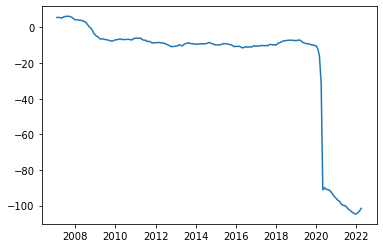

In [48]:
y_hat_SARIMAX = fit_res.predict(start=test_series.index[0], end=test_series.index[-1], exog=exog_final_test, typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_SARIMAX);

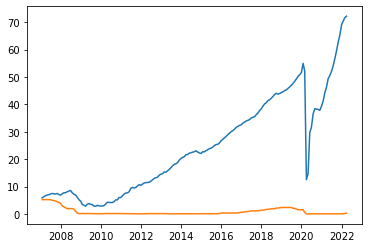

In [41]:
fig, ax = plt.subplots()
ax.plot(y_hat_SARIMAX)
ax.plot(test_series);

In [44]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,1,0), seasonal_order=(2,1,1,36))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                             FEDFUNDS   No. Observations:                  427
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 36)   Log Likelihood                -367.024
Date:                              Wed, 24 Aug 2022   AIC                            796.049
Time:                                      16:33:13   BIC                            918.999
Sample:                                  07-01-1971   HQIC                           844.787
                                       - 01-01-2007                                         
Covariance Type:                                opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.409e-09        nan        nan        nan         na

In [51]:
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(15,1,12), seasonal_order=(1,1,1,36))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mych

                                       SARIMAX Results                                        
Dep. Variable:                               FEDFUNDS   No. Observations:                  427
Model:             SARIMAX(15, 1, 12)x(1, 1, [1], 36)   Log Likelihood                -370.220
Date:                                Wed, 24 Aug 2022   AIC                            852.439
Time:                                        16:42:03   BIC                           1074.544
Sample:                                    07-01-1971   HQIC                           940.483
                                         - 01-01-2007                                         
Covariance Type:                                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.409e-09   7.05e-05   6.25e-05      